## ID800 data analysis
The aim of this data analysis is to extract a theoretical secure key rate with what data we have.
Before this can be done a few questions must be answered:

1. How effective is our single photon source?
2. How good are the detectors - what is the quantum error rate? detection efficency? dark count rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Introduction

We will begin by taking a quick look at the id800 data.

In [2]:
# Load data

det1_df = pd.read_csv('id800_data/0.493det1.txt', header = None)
det2_df = pd.read_csv('id800_data/-0.218det2.txt', header = None)
det3_df = pd.read_csv('id800_data/0.176det3.txt', header = None)
det4_df = pd.read_csv('id800_data/-0.552det4.txt', header = None)

We already know that the fibre on detector 1 is bad, so lets look at det2

In [3]:
det2_df.head(20)

,0,1
0,1094468611,8
1,1094480965,8
2,1094493317,8
3,1094505669,8
4,1094518021,8
5,1094530374,8
6,1094542725,8
7,1094555079,8
8,1094555332,3
9,1094567432,8


In [4]:
det2_df.shape

(9110000, 2)

The data is a list of time stamps with associated channel. Detector 8 is the trigger.

<strong>We can already see that the emitter is in the single photon regime, however with very poor efficency</strong> as most of the time nothing is detected. The alternative is that the  <strong>detector efficency is very low for some reason.</strong>

We can see that our data has two columns. The first column is a time stamp, it is not possible to read the time stamp directly; it must be converted first. The secound column is the detector.

We can calculate a conversion by averaging the difference between entires of channel 8. Which should equate to the 1 MHz trigger. <strong>See section 1.1</strong>





### 1.1 Time conversion

In [5]:
# Make a data frame where the channel is 8

trigger_df = det1_df[det1_df[1]==8]
diff_df = trigger_df.diff()

print('Time between each clock is about the same!')
print(diff_df.head(20))

print('\n Average of det1:')
print(diff_df.mean())

# check the other detectors:
trigger_df = det2_df[det2_df[1]==8]
diff_df = trigger_df.diff()
print('\n Average of det2:')
print(diff_df.mean())

trigger_df = det3_df[det3_df[1]==8]
diff_df = trigger_df.diff()
print('\n Average of det3:')
print(diff_df.mean())

trigger_df = det4_df[det4_df[1]==8]
diff_df = trigger_df.diff()
print('\n Average of det4:')
print(diff_df.mean())

Time between each clock is about the same!
          0    1
0       NaN  NaN
1   12352.0  0.0
2   12354.0  0.0
3   12352.0  0.0
4   12354.0  0.0
5   12352.0  0.0
6   12351.0  0.0
7   12352.0  0.0
8   12352.0  0.0
9   12354.0  0.0
10  12354.0  0.0
11  12352.0  0.0
12  12351.0  0.0
13  12352.0  0.0
14  12352.0  0.0
15  12353.0  0.0
16  12353.0  0.0
17  12353.0  0.0
18  12352.0  0.0
19  12350.0  0.0

 Average of det1:
0    136842.619432
1         0.000000
dtype: float64

 Average of det2:
0    137281.27458
1         0.00000
dtype: float64

 Average of det3:
0    137596.69225
1         0.00000
dtype: float64

 Average of det4:
0    136981.979721
1         0.000000
dtype: float64


The average time difference is much greater than it should be..

In [6]:
diff_df[diff_df[0] > 22350]

,0,1
10000,1.219925e+09,0.0
20000,1.196826e+09,0.0
30000,1.228658e+09,0.0
40000,1.224298e+09,0.0
50000,1.208771e+09,0.0
...,...,...
9060000,1.257427e+09,0.0
9070000,1.257761e+09,0.0
9080000,1.257538e+09,0.0
9090000,1.257588e+09,0.0


Look like our trigger does something funny every 1000 triggers. We can just filter them for now.

In [7]:
trigger_df = det1_df[(det1_df[1]==8)]
diff_df = trigger_df.diff()
diff_df = diff_df[diff_df < 20000]
print('\n Average of det1:')
print(diff_df.mean())

trigger_df = det2_df[(det2_df[1]==8)]
diff_df = trigger_df.diff()
diff_df = diff_df[diff_df < 20000]
print('\n Average of det1:')
print(diff_df.mean())

trigger_df = det3_df[(det3_df[1]==8)]
diff_df = trigger_df.diff()
diff_df = diff_df[diff_df < 20000]
print('\n Average of det1:')
print(diff_df.mean())

trigger_df = det4_df[(det4_df[1]==8)]
diff_df = trigger_df.diff()
diff_df = diff_df[diff_df < 20000]
print('\n Average of det1:')
print(diff_df.mean())


 Average of det1:
0    12352.422175
1        0.000000
dtype: float64

 Average of det1:
0    12352.42223
1        0.00000
dtype: float64

 Average of det1:
0    12352.422245
1        0.000000
dtype: float64

 Average of det1:
0    12352.422199
1        0.000000
dtype: float64


This result is more reasonable

Average time between each trigger: 12352.422

12352.422 is in arbitrary units. However can convert them because we know they should be equal to the frequency, 1MHz. 

12352.422 * TFACTOR = 10^-6

In [8]:
TFACTOR =  10**-6 / 12352.422
TFACTOR

8.095578340830648e-11

We can also check over what period data was collected. (I forgot)
As we know there are

In [9]:
# Check how many triggers there are and salculate length of experiment:

num = det1_df[det1_df[1]==8].shape[0] * 10**-6
print(num)

num = det2_df[det2_df[1]==8].shape[0] * 10**-6
print(num)

num = det3_df[det3_df[1]==8].shape[0] * 10**-6
print(num)

num = det4_df[det4_df[1]==8].shape[0] * 10**-6
print(num)


9.019927
8.998116
8.977845
9.010867


Looks to be about 9s.

We can check this result by looking at the time stamp of the first and last entry of a data frame.

In [10]:
(det2_df[0][len(det2_df)-1] - det1_df[0][0]) * TFACTOR

99.99975085906229

This inconsitency is worrying. We can explore this further by investigating plotting the time stamp.

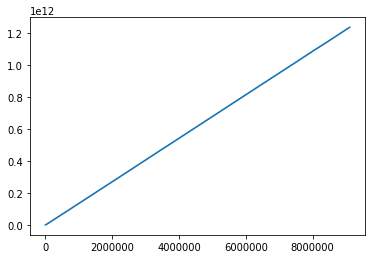

In [11]:
plt.plot(det2_df[0])

In [12]:
det2_df.tail(5)

,0,1
9109995,1236367115221,8
9109996,1236367127573,8
9109997,1236367139925,8
9109998,1236367152277,8
9109999,1236367164630,8


This is a straight line, as expected, nothing disastrous happened to the trigger.

<strong> Conclusion </strong>: 
- The data files are consistent and the time conversion factor is 7.289923991564929e-12. 
- The detectors are either very ineffecient or we are far from the ideal single photon regime.
- the lenght of experiment might have been 9s or 100s (more likely niether)

### 2. Expectations

To get an idea of how effective the single photon source is and the detectors we can tabulate how many detections were made.

In [13]:
# make a trigger column for each data frame which counts the number of triggers
det1_df['trigger_bool'] = np.where(det1_df[1] == 8, 1 ,0)
det1_df['trigger'] = det1_df['trigger_bool'].cumsum(axis=0)

det2_df['trigger_bool'] = np.where(det2_df[1] == 8, 1 ,0)
det2_df['trigger'] = det2_df['trigger_bool'].cumsum(axis=0)

det3_df['trigger_bool'] = np.where(det3_df[1] == 8, 1 ,0)
det3_df['trigger'] = det3_df['trigger_bool'].cumsum(axis=0)

det4_df['trigger_bool'] = np.where(det4_df[1] == 8, 1 ,0)
det4_df['trigger'] = det4_df['trigger_bool'].cumsum(axis=0)

# Now it will be possible to group by triggers
det1_table_df = det1_df.groupby(['trigger', 1]).size().unstack(fill_value=0)
det2_table_df = det2_df.groupby(['trigger', 1]).size().unstack(fill_value=0)
det3_table_df = det3_df.groupby(['trigger', 1]).size().unstack(fill_value=0)
det4_table_df = det4_df.groupby(['trigger', 1]).size().unstack(fill_value=0)

In [14]:
det2_table_df.head(20)

1,1,2,3,4,8
trigger,,,,,
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,1,0,1
9,0,0,0,0,1


Now we should be able to calulate a frequecy.

In [15]:
det1_counts = det1_table_df.sum()
det1_counts

1
1         66
2        798
3      40339
4      48871
8    9019927
dtype: int64

In [16]:
det2_counts = det2_table_df.sum()
det2_counts

1
1         13
2      31714
3      36737
4      43420
8    8998116
dtype: int64

In [17]:
det3_counts = det3_table_df.sum()
det3_counts

1
1         45
2      14939
3      67344
4      19827
8    8977845
dtype: int64

In [18]:
det4_counts = det4_table_df.sum()
det4_counts

1
1         57
2      17499
3       8990
4      72587
8    9010867
dtype: int64

Our single photon detectors have a quantum effiecency of 35%. Therefore for 9M pulses, 3.15M pulses are expected. We are getting much less than that.

Text(0.5, 1.0, 'detector 1')

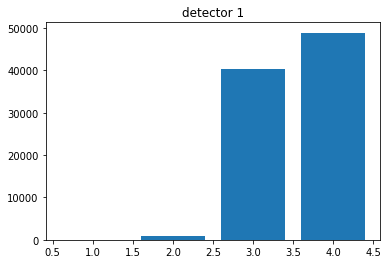

In [19]:
plt.bar([1,2,3,4],det1_counts.array[0:4])
plt.title('detector 1')

Text(0.5, 1.0, 'detector 2')

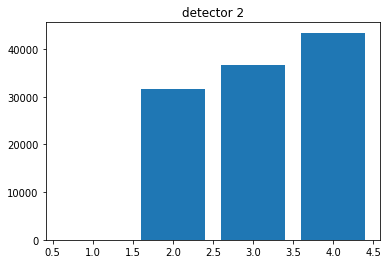

In [20]:
plt.bar([1,2,3,4],det2_counts.array[0:4])
plt.title('detector 2')

Text(0.5, 1.0, 'detector 3')

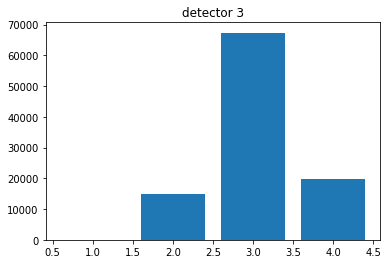

In [21]:
plt.bar([1,2,3,4],det3_counts.array[0:4])
plt.title('detector 3')

Text(0.5, 1.0, 'detector 4')

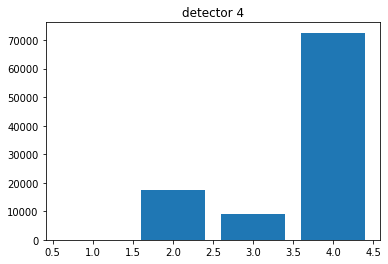

In [22]:
plt.bar([1,2,3,4],det4_counts.array[0:4])
plt.title('detector 4')

<strong> Conclusion </strong>:
- Results from detector 1 channel show that detector 1 is very bad.
- Results from detector 2 channel is confusing.
- Detector channel 3 and 4 look good.

### 3. Filtering

It may be possible to improve the histograms by filtering using a coincidence window.

I do not know the most efficient way of doing this, however the easiest way is probably to make an array for every pulse, and store all the arrays in a giant list and create a new list with a filtering loop.

In [23]:
#It will be convinient to delete all the empty eventS:

m1 = (det1_df['trigger_bool']== det1_df['trigger_bool'].shift(-1))
pulses_det1_df = det1_df[~(m1)]

m1 = (det2_df['trigger_bool']== det2_df['trigger_bool'].shift(-1))
pulses_det2_df = det2_df[~(m1)]

m1 = (det3_df['trigger_bool']== det3_df['trigger_bool'].shift(-1))
pulses_det3_df = det3_df[~(m1)]

m1 = (det4_df['trigger_bool']== det4_df['trigger_bool'].shift(-1))
pulses_det4_df = det4_df[~(m1)]

In [24]:
# Make arrays
arrays_det1_df= pulses_det1_df.groupby(['trigger']).apply(np.array)
arrays_det2_df= pulses_det2_df.groupby(['trigger']).apply(np.array)
arrays_det3_df= pulses_det3_df.groupby(['trigger']).apply(np.array)
arrays_det4_df= pulses_det4_df.groupby(['trigger']).apply(np.array)


In [25]:
arrays_det2_df.head(10)

trigger
8         [[1094555079, 8, 1, 8], [1094555332, 3, 0, 8]]
145    [[1096247358, 8, 1, 145], [1096247590, 4, 0, 1...
194    [[1096852627, 8, 1, 194], [1096852860, 4, 0, 1...
233    [[1097334373, 8, 1, 233], [1097334631, 3, 0, 2...
248    [[1097519659, 8, 1, 248], [1097519893, 4, 0, 2...
270    [[1097791414, 8, 1, 270], [1097791648, 4, 0, 2...
306    [[1098236103, 8, 1, 306], [1098236354, 3, 0, 3...
519    [[1100867164, 8, 1, 519], [1100867411, 2, 0, 5...
611    [[1102003590, 8, 1, 611], [1102003848, 3, 0, 6...
768    [[1103942919, 8, 1, 768], [1103943178, 3, 0, 7...
dtype: object

We know from Eleanors data that the coincidence window is around 2.445ns (average across detectors) with jitter time 0.05. However there is some variation between detectors.

For now we will use a relatively conversvative window accross the detectors of:
2.3ns to 2.7ns
We can convert this to the time stamp using our ~~conversion factor calculated previously~~ based on the photon counter manual.

In [26]:
LOW_T = 2.3/0.010125
LOW_T

227.16049382716048

In [27]:
HIGH_T = 2.7/0.010125
HIGH_T

266.6666666666667

We will now apply the filter to each data set:

In [28]:
filtered_det1 = []

for pulse in arrays_det1_df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < HIGH_T and t_i > LOW_T:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered_det1.append(new_pulse)

filtered_det1_df = pd.DataFrame(np.concatenate(filtered_det1))
filtered_det1_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']

In [29]:
filtered_det2 = []

for pulse in arrays_det2_df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < HIGH_T and t_i > LOW_T:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered_det2.append(new_pulse)

filtered_det2_df = pd.DataFrame(np.concatenate(filtered_det2))
filtered_det2_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']

In [30]:
filtered_det3 = []

for pulse in arrays_det3_df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < HIGH_T and t_i > LOW_T:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered_det3.append(new_pulse)

filtered_det3_df = pd.DataFrame(np.concatenate(filtered_det3))
filtered_det3_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']

In [31]:
filtered_det4 = []

for pulse in arrays_det4_df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < HIGH_T and t_i > LOW_T:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered_det4.append(new_pulse)

filtered_det4_df = pd.DataFrame(np.concatenate(filtered_det4))
filtered_det4_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']

Now we can see how our filtering affected the histograms.

channel
1       42
2      751
3    35413
4    46360
8    82566
dtype: int64


Text(0.5, 1.0, 'detector 1 filtered')

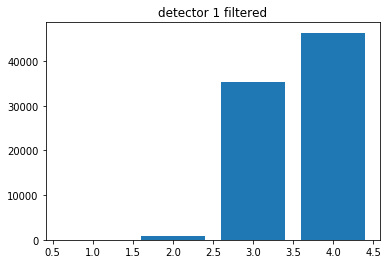

In [32]:
filtered_table_det1_df = filtered_det1_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_det1_counts = filtered_table_det1_df.sum()
print(filtered_det1_counts)

plt.bar([1,2,3,4],filtered_det1_counts.array[0:4])
plt.title('detector 1 filtered')

channel
1         2
2     30105
3     32279
4     40984
8    103370
dtype: int64


Text(0.5, 1.0, 'detector 2 filtered')

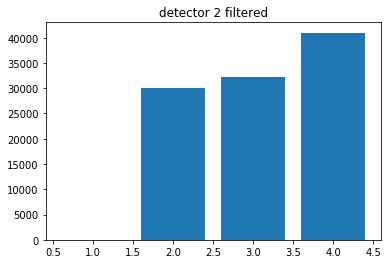

In [33]:
filtered_table_det2_df = filtered_det2_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_det2_counts = filtered_table_det2_df.sum()
print(filtered_det2_counts)

plt.bar([1,2,3,4],filtered_det2_counts.array[0:4])
plt.title('detector 2 filtered')

channel
1       20
2    14111
3    59075
4    18656
8    91862
dtype: int64


Text(0.5, 1.0, 'detector 3 filtered')

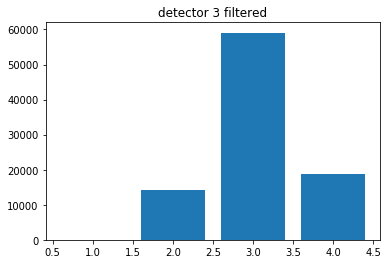

In [34]:
filtered_table_det3_df = filtered_det3_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_det3_counts = filtered_table_det3_df.sum()
print(filtered_det3_counts)

plt.bar([1,2,3,4],filtered_det3_counts.array[0:4])
plt.title('detector 3 filtered')

channel
1       30
2    16655
3     7837
4    68931
8    93453
dtype: int64


Text(0.5, 1.0, 'detector 4 filtered')

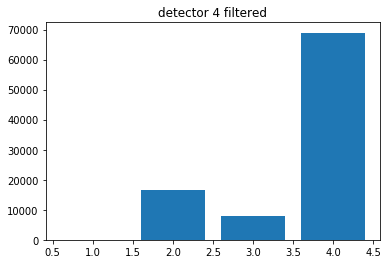

In [35]:
filtered_table_det4_df = filtered_det4_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_det4_counts = filtered_table_det4_df.sum()
print(filtered_det4_counts)

plt.bar([1,2,3,4],filtered_det4_counts.array[0:4])
plt.title('detector 4 filtered')

See power point for results:
I'm suprised by how little difference filtering has made.

## 3.1 More aggressive filtering

From Eleanors Delay time, it appears that there is either significant variation in the path length the photon had to travel or the detector/channel response time varied.

In this section we will focus on just detector 4.

channel
2        3
4    15283
8    15286
dtype: int64


Text(0.5, 1.0, 'detector 4 filtered')

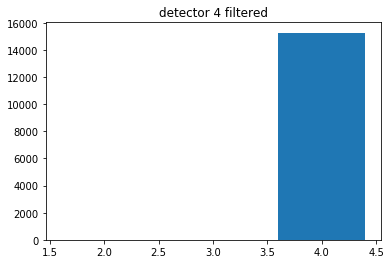

In [41]:
# filter values: Delay time for detector 4 is: 2.3679 to 2.3679 (2* FWHM)

LOW_T = 2.3679/0.010125
HIGH_T = 2.3721/0.010125

filtered_det4 = []

for pulse in arrays_det4_df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < HIGH_T and t_i > LOW_T:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered_det4.append(new_pulse)

filtered_det4_df = pd.DataFrame(np.concatenate(filtered_det4))
filtered_det4_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']


filtered_table_det4_df = filtered_det4_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_det4_counts = filtered_table_det4_df.sum()
print(filtered_det4_counts)

plt.bar([2,4],filtered_det4_counts.array[0:2])
plt.title('detector 4 filtered')

Aggressive filtering was very effective.

### 3.1.1 Detectors

channel
2      440
3    35605
4      181
8    36226
dtype: int64


Text(0.5, 1.0, 'detector 3 filtered')

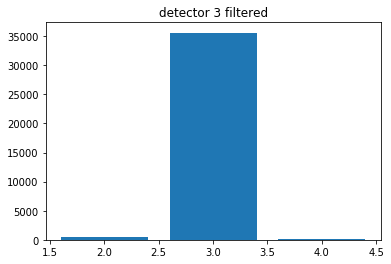

In [47]:
# filter values: Delay time for detector 3 is: 2.558 to 2.642 (FWHM)
lt = 2.579/0.010125
ht = 2.621/0.010125
df = arrays_det3_df
title = 'detector 3 filtered'

filtered = []

for pulse in df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < ht and t_i > lt:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered.append(new_pulse)

filtered_df = pd.DataFrame(np.concatenate(filtered))
filtered_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']

filtered_table_df = filtered_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_counts = filtered_table_df.sum()
print(filtered_counts)

plt.bar([2,3,4],filtered_counts.array[0:3])
plt.title(title)





channel
2    26828
3     6445
4     2132
8    35405
dtype: int64


Text(0.5, 1.0, 'detector 2 filtered')

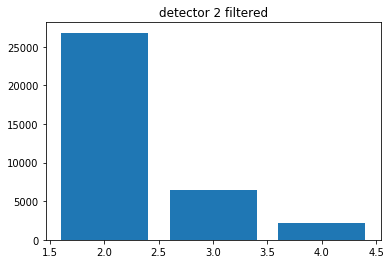

In [50]:
# filter values: Delay time for detector 2 is: 2.467 to 2.579 (FWHM)
lt = 2.467/0.010125
ht = 2.579/0.010125
df = arrays_det2_df
title = 'detector 2 filtered'

filtered = []

for pulse in df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < ht and t_i > lt:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered.append(new_pulse)

filtered_df = pd.DataFrame(np.concatenate(filtered))
filtered_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']

filtered_table_df = filtered_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_counts = filtered_table_df.sum()
print(filtered_counts)

plt.bar([2,3,4],filtered_counts.array[0:3])
plt.title(title)

channel
1      35
2       1
4    3886
8    3922
dtype: int64


Text(0.5, 1.0, 'detector 1 filtered')

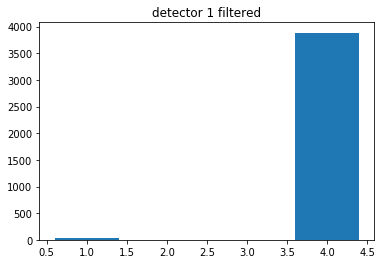

In [57]:
# filter values: Delay time for detector 1 is: 2.295 to 2.3445 (FWHM)
lt = 2.295/0.010125
ht = 2.3445/0.010125
df = arrays_det1_df
title = 'detector 1 filtered'

filtered = []

for pulse in df:
    t_start = pulse[0][0]
    new_pulse = [pulse[0]]
    
    for i in range(1,len(pulse)):
        t_i = pulse[i][0] - t_start
        if t_i < ht and t_i > lt:
            new_pulse.append(pulse[i])
    
    if len(new_pulse) > 1:
        filtered.append(new_pulse)

filtered_df = pd.DataFrame(np.concatenate(filtered))
filtered_df.columns = ['time', 'channel', 'trigger_bool', 'trigger']

filtered_table_df = filtered_df.groupby(['trigger', 'channel']).size().unstack(fill_value=0)

filtered_counts = filtered_table_df.sum()
print(filtered_counts)

plt.bar([1,3,4],filtered_counts.array[0:3])
plt.title(title)

In [52]:
2.32 - 0.049/2

2.2954999999999997